<a href="https://colab.research.google.com/github/mahmoudarekat/PredictionofProductSales/blob/main/PredictionofProductSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
from statistics import mode
import matplotlib.pyplot as plt
import seaborn as sns

##Loading Data

In [ ]:
fpath='/content/drive/MyDrive/DS Coding Dojo/Week2/sales_predictions_2023.csv'

In [ ]:
df_sales=pd.read_csv(fpath)

In [ ]:
df_sales.head()
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning
###Value Counts

Print Value Counts for All Columns

In [ ]:
for i in df_sales:

    print(i)
    print(df_sales[i].value_counts())
    print("")


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
He

###Handling Nulls

In [ ]:
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales['Item_Weight']=df_sales['Item_Weight'].fillna(-1)
df_sales['Outlet_Size']=df_sales['Outlet_Size'].fillna("MISSING")

###Duplicate Rows

In [ ]:
dup_rows=df_sales.duplicated(keep='first')
dup_rows.sum()

0

No Dup Rows

###Consistency
By looking at the value counts there are incosistencies in Item_Fat_Content Column

In [ ]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Make it either LF or RF

In [ ]:
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('Low Fat','LF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('low fat','LF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('Regular','RF')
df_sales['Item_Fat_Content']=df_sales['Item_Fat_Content'].replace('reg','RF')




In [ ]:
#Check
df_sales['Item_Fat_Content'].value_counts()

LF    5517
RF    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df_numeric=df_sales.select_dtypes("number")
df_numeric

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


###Central Tendency Functions
ctf function

In [ ]:
def ctf(data_list, verbose):

  if(verbose):

      print(" the mean is "+str(np.mean(data_list))+" and the median is "+str(np.median(data_list))+" and the mode is "+str(mode(data_list)))
  else:
    print(np.mean(data_list))
    print(np.median(data_list))
    print(mode(data_list))

In [ ]:
for i in df_numeric:

    print(i)
    ctf(df_numeric[i],True)
    print(" ")


Item_Weight
 the mean is 10.478936407368296 and the median is 11.0 and the mode is -1.0
 
Item_Visibility
 the mean is 0.06613202877895108 and the median is 0.053930934 and the mode is 0.0
 
Item_MRP
 the mean is 140.9927819781767 and the median is 143.0128 and the mode is 172.0422
 
Outlet_Establishment_Year
 the mean is 1997.8318667135984 and the median is 1999.0 and the mode is 1985
 
Item_Outlet_Sales
 the mean is 2181.288913575032 and the median is 1794.331 and the mode is 958.752
 


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


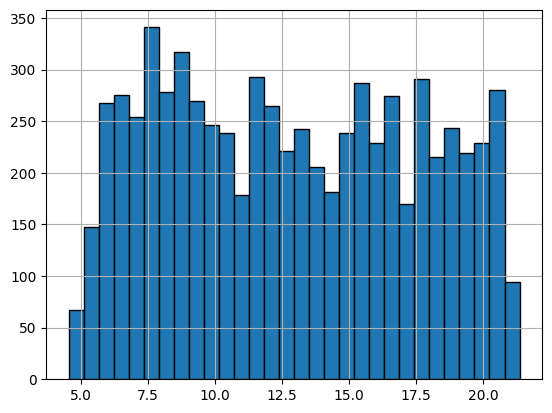

In [ ]:
df = df_sales[df_sales['Item_Weight']>0]
ax=df['Item_Weight'].hist(bins = 30, edgecolor = 'black')


This histogram shows the distribution of the weights of the items

---



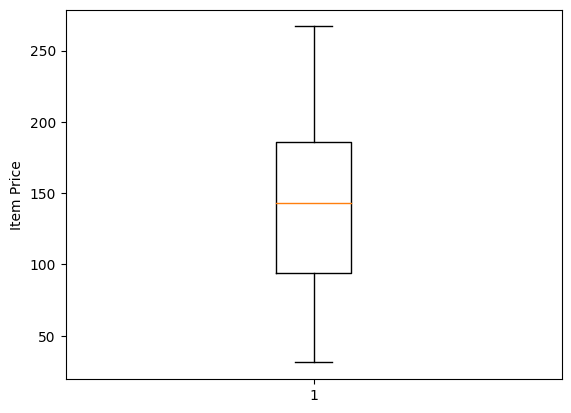

In [ ]:
fig, ax = plt.subplots()
data = df_sales["Item_MRP"]
ax.boxplot(data);
ax.set_ylabel("Item Price");


CountPlot

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

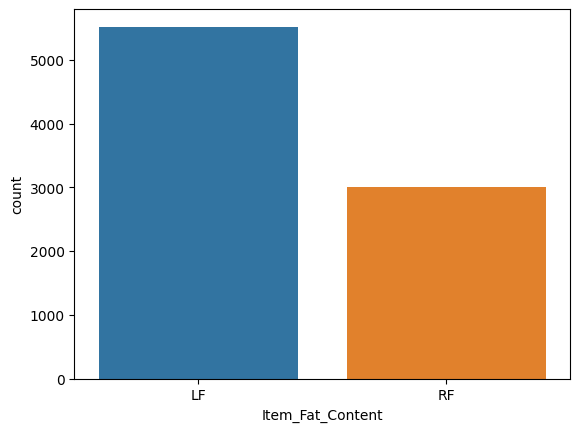

In [ ]:
sns.countplot(df_sales, x="Item_Fat_Content")
